# Explore here

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


## Cargar el dataset

In [53]:
URL = "https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv"

df = pd.read_csv(URL, usecols=["Latitude", "Longitude", "MedInc"])

X_train, X_test = train_test_split(
    df, test_size=0.20, random_state=42, shuffle=True
)

In [54]:
X_train.to_csv("../data/train_with_clusters.csv", index=False)
X_test.to_csv("../data/test_with_clusters.csv", index=False)

## K-Means

In [55]:
model_kmeans = KMeans(n_clusters = 6, n_init = "auto", random_state = 42)
model_kmeans.fit(X_train)

KMeans(n_clusters=6, random_state=42)

In [56]:
y_train = list(model_kmeans.labels_)
X_train["cluster"] = y_train
X_train.head()

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,3
8267,3.8125,33.77,-118.16,1
17445,4.1563,34.66,-120.48,1
14265,1.9425,32.69,-117.11,3
2271,3.5542,36.78,-119.80,5


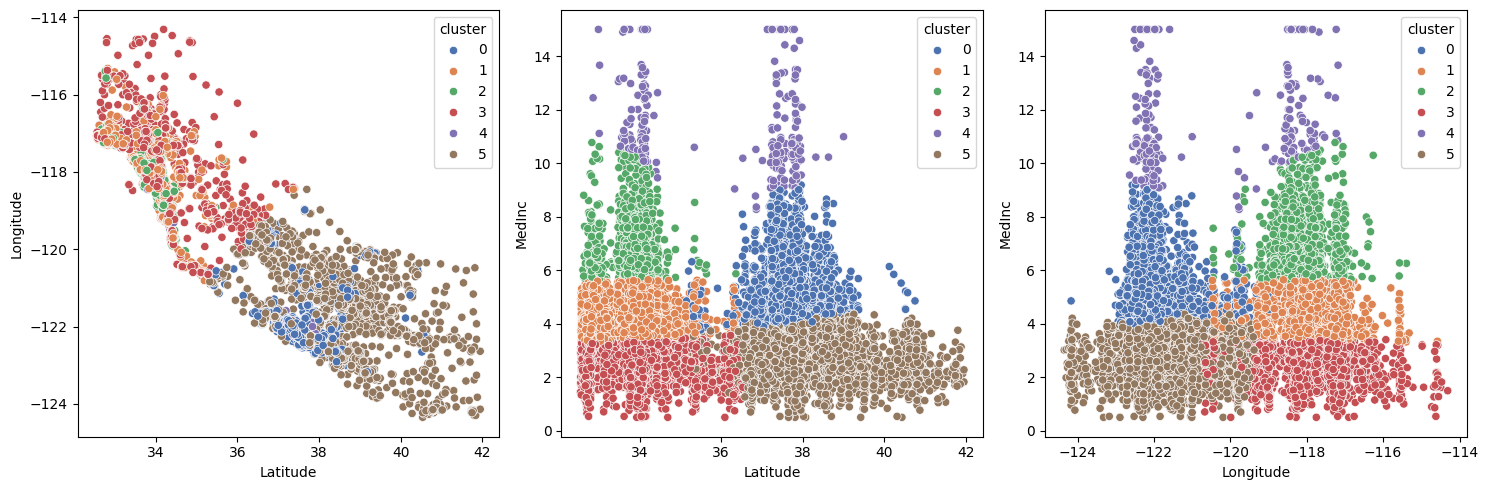

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep")
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep")
plt.tight_layout()

plt.show()

- El clúster 4 se concentra en una zona con una `MedInc` muy alta
- El clúster 1 pertenece una zona del sur
- El clúster 0 tiene mucha dispersión en todas las gráficas


## Predicción con el conjunto de test

In [58]:
y_test = list(model_kmeans.predict(X_test))
X_test["cluster"] = y_test
X_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,5
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,5


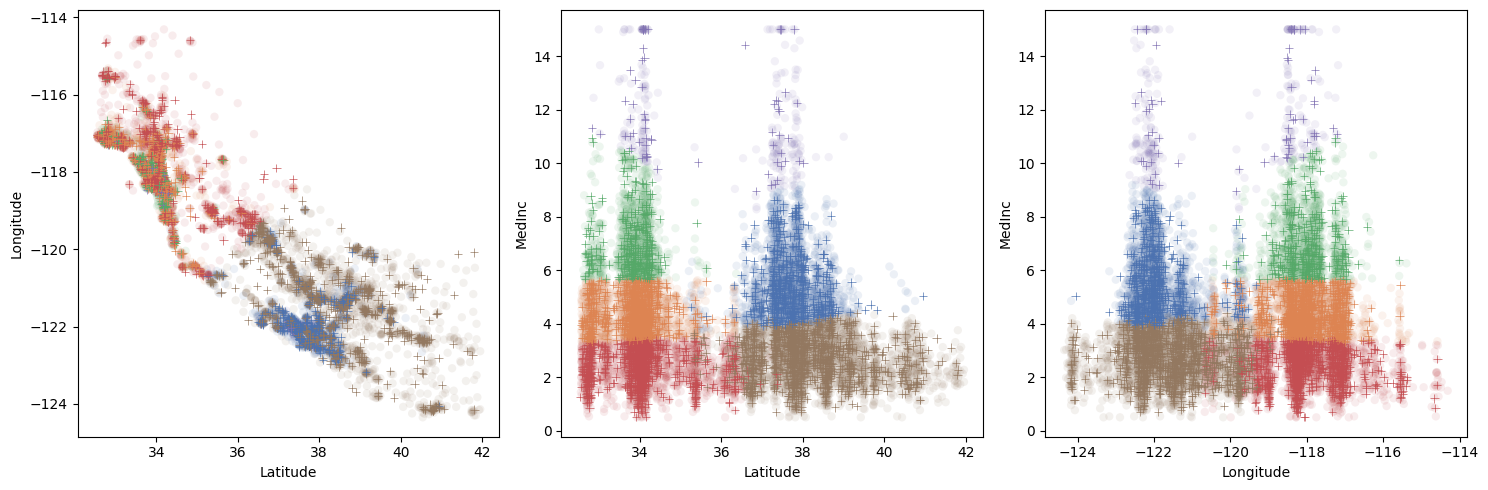

In [59]:
fig, axis = plt.subplots(1, 3, figsize = (15, 5))

sns.scatterplot(ax = axis[0], data = X_train, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[1], data = X_train, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)
sns.scatterplot(ax = axis[2], data = X_train, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", alpha  = 0.1)

sns.scatterplot(ax = axis[0], data = X_test, x = "Latitude", y = "Longitude", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[1], data = X_test, x = "Latitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")
sns.scatterplot(ax = axis[2], data = X_test, x = "Longitude", y = "MedInc", hue = "cluster", palette = "deep", marker = "+")

plt.tight_layout()

for ax in axis:
    ax.legend([],[], frameon=False)

plt.show()

Altamente similar al de train, lo cual indica que las predicciones pueden ser buenas

## Aprendizaje supervisado

In [60]:
model_rf = RandomForestClassifier(random_state = 42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
y_pred = model_rf.predict(X_test)
y_pred

array([3, 3, 5, ..., 4, 5, 1], dtype=int32)

In [62]:
accuracy_score(y_test, y_pred)

1.0

## Guardado

In [64]:
with open("../models/model_kmeans.pkl", "wb") as f:
    pickle.dump(model_kmeans, f)
    
with open("../models/model_rf.pkl", "wb") as f:
    pickle.dump(model_rf, f)